In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
variables = ["A2", "A3", "A8", "A11", "A14", "A15", "A16"]

data = pd.read_csv("creditApprovalUCI.csv", usecols=variables)
data.head()

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,202.0,0,1
1,58.67,4.460,3.04,6,43.0,560,1
2,24.50,NaN,NaN,0,280.0,824,1
3,27.83,1.540,3.75,5,100.0,3,1
4,20.17,5.625,1.71,0,120.0,0,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("A16", axis=1), 
    data["A16"], 
    test_size=0.3, 
    random_state=0
)

X_train.shape, X_test.shape

X_train.isnull().mean()

A2     0.022774
A3     0.140787
A8     0.140787
A11    0.000000
A14    0.014493
A15    0.000000
dtype: float64

array([[<Axes: title={'center': 'A2'}>, <Axes: title={'center': 'A3'}>],
       [<Axes: title={'center': 'A8'}>, <Axes: title={'center': 'A11'}>],
       [<Axes: title={'center': 'A14'}>, <Axes: title={'center': 'A15'}>]],
      dtype=object)

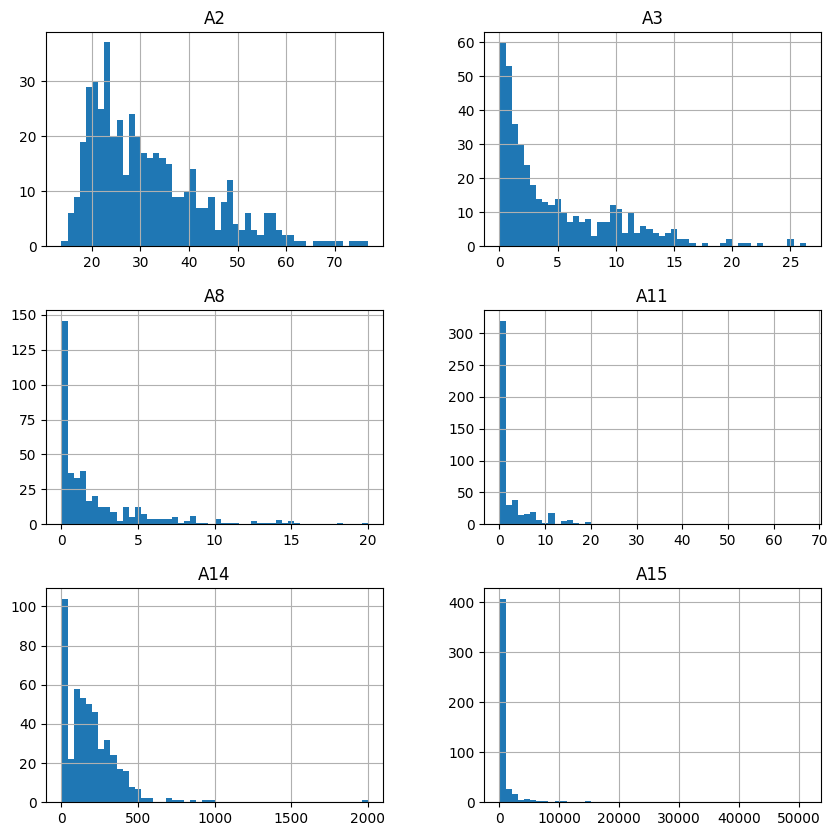

In [5]:
X_train.hist(bins=50, figsize=(10,10))

In [6]:
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    initial_strategy="mean",
    max_iter=10,
    imputation_order="ascending",
    n_nearest_features=None,
    skip_complete=True,
    random_state=0 
)

imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), random_state=0, skip_complete=True)

In [7]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

pd.DataFrame(train_t, columns=X_train.columns).isnull().sum()

A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
dtype: int64